<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df= pd.read_csv('survey_data.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [18]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


# checking null values

In [4]:
df.isna().sum()

timestamp        0
q1               0
q2              75
q3               1
q4           20835
q5               0
q6            7315
q7               0
q8           27897
q9           25061
q10              0
q11           5034
q12             82
q13              0
q14              0
q15            223
q16            171
q17            177
dtype: int64

In [5]:
df.isna().sum()/len(df)*100

timestamp     0.000000
q1            0.000000
q2            0.266828
q3            0.003558
q4           74.124804
q5            0.000000
q6           26.024619
q7            0.000000
q8           99.249324
q9           89.159670
q10           0.000000
q11          17.909492
q12           0.291732
q13           0.000000
q14           0.000000
q15           0.793368
q16           0.608368
q17           0.629714
dtype: float64

# checking duplicates

In [6]:
df.duplicated().sum()

0

# details of the columns

timestamp: Date and time when the survey response was submitted. Useful for analyzing trends over time.

q1 (Age Group): Age range of the respondent (e.g., 18-24, 25-34, etc.).

q2 (Industry): Industry in which the respondent works (e.g., Tech, Finance, Healthcare, etc.). Often free-form text, which can lead to many unique entries.

q3 (Job Title): Respondent's job title (e.g., Software Engineer, Data Scientist, Marketing Manager, etc.). Usually free-form text.

q4 (Experience in Current Role): Years or months the respondent has been in their current role.

q5 (Salary): Respondent's annual salary (or hourly wage, depending on the survey). This is the key numerical variable.

q6 (Bonus): Amount of bonus or additional compensation received by the respondent.

q7 (Currency): Currency in which the salary and bonus are paid (e.g., USD, EUR, GBP, etc.).

q8 (Additional Comments/Benefits): Free-form text field for any additional comments or information about benefits, perks, etc.

q9 (Other Languages): Languages spoken by the respondent (often free-form text).

q10 (Country): Country where the respondent is located.

q11 (State/Region/Location): State, region, or other location information (can be more granular than country).

q12 (City): City of residence or work.

q13 (Years in Current Industry): Years of experience in the respondent's current industry.

q14 (Years of Experience Overall): Total years of work experience.

q15 (Education Level): Highest level of education attained by the respondent (e.g., High School, Bachelor's Degree, Master's Degree, PhD, etc.).

q16 (Gender): Gender of the respondent.

q17 (Race/Ethnicity): Race or ethnicity of the respondent.

In [7]:
df.describe(include='all')

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
count,28108,28108,28033,28107,7273,28108,2.079300e+04,28108,211,3047,28108,23074,28026,28108,28108,27885,27937,27931
unique,25326,7,1220,14377,7010,4319,NaN,11,124,2983,382,137,4841,8,8,6,5,51
top,4/27/2021 11:05:08,25-34,Computing or Tech,Software Engineer,Fundraising,"60,000",NaN,USD,INR,Hourly,United States,California,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
freq,5,12668,4711,286,20,430,NaN,23410,11,4,9004,2611,772,9630,6542,13536,21389,23235
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.824460e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.336249e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# checking unique values

In [8]:
print("Unique values in q2 (Industry):", df['q2'].unique())


Unique values in q2 (Industry): ['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Student ' 'Wine & Spirits'
 'Social networks']


In [9]:
print("Unique values in q3 (Job Title):", df['q3'].unique())


Unique values in q3 (Job Title): ['Research and Instruction Librarian'
 'Change & Internal Communications Manager' 'Marketing Specialist' ...
 'Product communication and education specialist'
 'Director of content design' 'CMO']


In [10]:
print("Unique values in q5 (Salary):", df['q5'].unique())


Unique values in q5 (Salary): ['55,000' '54,600' '34,000' ... '10' '24000000' '279000']


In [11]:
print("Value  counts in q5 (Salary):", df['q5'].value_counts())


Value  counts in q5 (Salary): q5
60,000    430
80,000    406
70,000    402
65,000    400
75,000    383
         ... 
69,888      1
97,129      1
83,600      1
52,260      1
279000      1
Name: count, Length: 4319, dtype: int64


In [12]:
print("Unique values in q6 (Bonus):", df['q6'].unique())


Unique values in q6 (Bonus): [0.00000e+00 4.00000e+03         nan 3.00000e+03 7.00000e+03 2.00000e+03
 1.00000e+04 5.00000e+02 5.00000e+03 1.00000e+03 1.50000e+04 1.00000e+02
 5.00000e+04 6.00000e+03 2.00000e+04 1.50000e+03 2.50000e+03 4.00000e+04
 2.50000e+04 8.40000e+03 3.60000e+03 1.30000e+04 8.50000e+03 6.00000e+04
 8.00000e+03 3.05000e+02 1.60830e+04 1.50000e+02 3.00000e+04 9.00000e+03
 7.50000e+03 1.87500e+04 1.20000e+04 1.40000e+03 5.50000e+04 1.40000e+04
 1.75500e+04 2.40000e+03 1.89000e+05 3.50000e+03 5.75000e+03 2.70000e+03
 1.30000e+05 3.10000e+04 2.00000e+02 8.80000e+03 1.75000e+05 2.30000e+03
 1.60000e+04 3.50000e+04 3.14050e+04 8.00000e+04 7.00000e+04 2.80000e+04
 3.40000e+04 1.80000e+04 1.17000e+04 8.00000e+02 4.00000e+02 9.00000e+02
 1.32180e+04 6.50000e+03 7.20000e+02 1.78500e+04 8.55000e+03 5.25000e+03
 1.20000e+03 2.23000e+05 1.00000e+05 5.20000e+03 3.05650e+04 7.00000e+00
 1.75000e+03 8.20000e+03 1.80000e+03 1.16000e+04 5.95000e+03 3.07500e+04
 7.13000e+03 2.40550e+

In [13]:
print("Unique values in q7 (Currency):", df['q7'].unique())


Unique values in q7 (Currency): ['USD' 'GBP' 'CAD' 'EUR' 'AUD/NZD' 'Other' 'CHF' 'ZAR' 'SEK' 'HKD' 'JPY']


In [14]:
print("Unique values in q10 (Country):", df['q10'].unique())


Unique values in q10 (Country): ['United States' 'United Kingdom' 'US' 'USA' 'Canada' 'United Kingdom '
 'usa' 'UK' 'Scotland ' 'U.S.' 'United States ' 'The Netherlands'
 'Australia ' 'Spain' 'us' 'Usa' 'England' 'finland'
 'United States of America' 'France' 'United states' 'Scotland' 'USA '
 'United states ' 'Germany' 'UK ' 'united states' 'Ireland' 'India'
 'Australia' 'Uk' 'United States of America ' 'U.S. ' 'canada' 'Canada '
 'U.S>' 'ISA' 'Argentina' 'Great Britain ' 'US ' 'United State' 'U.S.A'
 'Denmark' 'U.S.A.' 'America' 'Netherlands' 'netherlands' 'England '
 'united states of america' 'Ireland ' 'Switzerland' 'Netherlands '
 'Bermuda' 'Us' 'The United States' 'United State of America' 'Germany '
 'Malaysia' 'Mexico ' 'United Stated' 'South Africa ' 'Belgium'
 'Northern Ireland' 'u.s.' 'South Africa' 'UNITED STATES' 'united States'
 'Sweden' 'Hong Kong' 'Kuwait' 'Norway' 'Sri lanka' 'Contracts'
 'USA-- Virgin Islands' 'United Statws' 'England/UK' 'U.S'
 "We don't get raises,

In [15]:
print("Unique values in q11 (State/Region/Location):", df['q11'].unique())


Unique values in q11 (State/Region/Location): ['Massachusetts' nan 'Tennessee' 'Wisconsin' 'South Carolina'
 'New Hampshire' 'Arizona' 'Missouri' 'Florida' 'Pennsylvania' 'Michigan'
 'Minnesota' 'Illinois' 'California' 'Georgia' 'Ohio'
 'District of Columbia' 'Maryland' 'Texas' 'Virginia' 'North Carolina'
 'New York' 'New Jersey' 'Rhode Island' 'Colorado' 'Oregon' 'Washington'
 'Indiana' 'Iowa' 'Nebraska' 'Oklahoma' 'Maine' 'Connecticut'
 'South Dakota' 'West Virginia' 'Idaho' 'Louisiana' 'Montana' 'Kentucky'
 'North Dakota' 'Kansas' 'Vermont' 'Arkansas' 'Alabama' 'Nevada'
 'Delaware' 'New Mexico' 'Hawaii' 'Utah' 'Mississippi' 'Kentucky, Ohio'
 'District of Columbia, Virginia' 'District of Columbia, Maryland'
 'Alaska' 'Arizona, Washington' 'Georgia, New York' 'California, Colorado'
 'California, Oregon'
 'District of Columbia, Maryland, Pennsylvania, Virginia'
 'Arizona, California' 'North Carolina, Utah' 'Wyoming' 'Ohio, Wyoming'
 'Georgia, Tennessee' 'Massachusetts, Oregon' 'Alabama

In [16]:
print("Unique values in q12 (City):", df['q12'].unique())


Unique values in q12 (City): ['Boston' 'Cambridge' 'Chattanooga' ... 'Rabat'
 'Tifton, Valdosta, Jacksonville' 'Dar es Salaam']


In [17]:
print("Unique values in q13 (Years in Current Industry):", df['q13'].unique())


Unique values in q13 (Years in Current Industry): ['5-7 years' '8 - 10 years' '2 - 4 years' '21 - 30 years' '11 - 20 years'
 '1 year or less' '41 years or more' '31 - 40 years']


In [18]:
print("Unique values in q14 (Years of Experience Overall):", df['q14'].unique())


Unique values in q14 (Years of Experience Overall): ['5-7 years' '2 - 4 years' '21 - 30 years' '11 - 20 years'
 '1 year or less' '8 - 10 years' '31 - 40 years' '41 years or more']


In [19]:
print("Unique values in q15 (Education):", df['q15'].unique())


Unique values in q15 (Education): ["Master's degree" 'College degree' 'PhD' nan 'Some college' 'High School'
 'Professional degree (MD, JD, etc.)']


In [20]:
print("Unique values in q16 (Gender):", df['q16'].unique())


Unique values in q16 (Gender): ['Woman' 'Non-binary' 'Man' nan 'Other or prefer not to answer'
 'Prefer not to answer']


In [21]:
print("Value Counts in q16 (Gender):", df['q16'].value_counts())


Value Counts in q16 (Gender): q16
Woman                            21389
Man                               5502
Non-binary                         747
Other or prefer not to answer      298
Prefer not to answer                 1
Name: count, dtype: int64


In [22]:
print("Unique values in q17 (Ethnicity):", df['q17'].unique())

Unique values in q17 (Ethnicity): ['White' 'Hispanic, Latino, or Spanish origin, White'
 'Asian or Asian American, White' 'Asian or Asian American'
 'Another option not listed here or prefer not to answer'
 'Hispanic, Latino, or Spanish origin'
 'Middle Eastern or Northern African'
 'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White'
 'Black or African American' 'Black or African American, White' nan
 'Black or African American, Hispanic, Latino, or Spanish origin, White'
 'Native American or Alaska Native'
 'Native American or Alaska Native, White'
 'Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer'
 'Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White'
 'White, Another option not listed here or prefer not to answer'
 'Black or African American, Native American or Alaska Native, White'
 'Asian or Asian American, Another option not listed here or prefer not to answ

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)



print("\nSummary statistics for q6 (normal notation):")
print(df['q6'].describe())


Summary statistics for q6 (normal notation):
count       20793.00
mean        18244.60
std        833624.90
min             0.00
25%             0.00
50%          2000.00
75%         10000.00
max     120000000.00
Name: q6, dtype: float64


# boxplot of q6

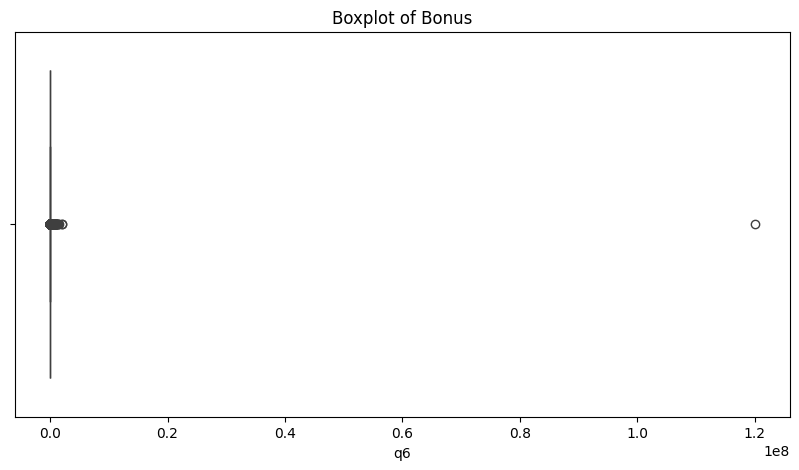

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['q6'])
plt.title('Boxplot of Bonus')
plt.show()


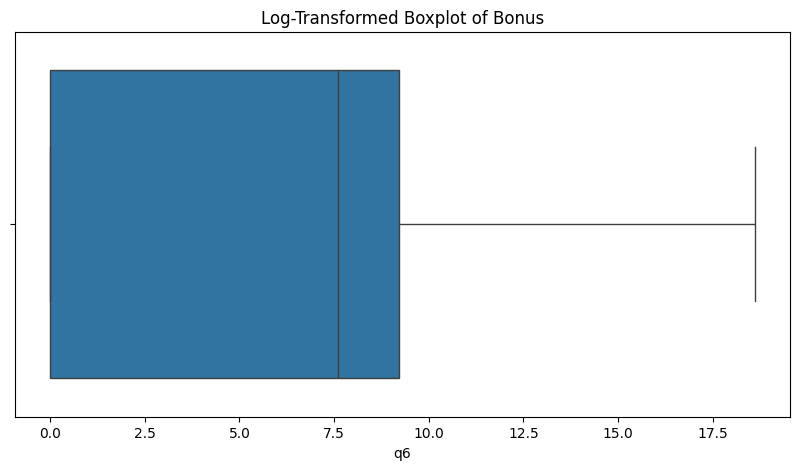

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x=np.log1p(df['q6']))
plt.title('Log-Transformed Boxplot of Bonus')
plt.show()


**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

[Add you answer to this markdown cell]

The dataset is in a highly unstructured and incomplete state, requiring extensive cleaning and preprocessing before it can be effectively analyzed or used for machine learning. The dataset consists of 28,108 entries across 18 columns, capturing various aspects of survey responses such as salary, industry, job title, location, and demographic details. However, several key issues significantly impact its usability.

Missing Data: A major concern is the high percentage of missing values across multiple columns. q4 (Experience in Current Role) is 74% missing, q8 (Additional Comments/Benefits) is 99% missing, and q9 (Other Languages) is 89% missing, making these columns nearly unusable. Moreover, q6 (Bonus) has 26% missing values, while q11 (State/Region/Location) is missing in 17.9% of the records. The missing data in crucial numerical and categorical fields poses a significant challenge for reliable insights.


Inconsistent Formatting: The dataset suffers from inconsistencies, especially in columns like q5 (Salary), which includes values with commas (e.g., "55,000"), requiring conversion to numeric format for proper calculations. Similarly, the q10 (Country) column contains various representations of the same country, such as "US," "USA," "United States," "U.S.," creating inconsistencies in regional analyses. 


Categorical Data Issues: Many categorical columns such as q2 (Industry), q3 (Job Title), q15 (Education), q16 (Gender), and q17 (Ethnicity) contain free-form text entries, multiple variations of the same category, and "Other" or "Prefer not to answer" responses. With more unique values in q2 (Industry) and  in q3 (Job Title), the dataset presents high cardinality issues that need to be addressed. Standardizing these categories by grouping similar entries will be crucial.


Outliers and Extreme Values: The dataset contains extreme numerical outliers, particularly in the q5 (Salary) and q6 (Bonus) columns. Salary values range from $10 to $24,000,000, while bonus values go as high, which likely indicate data entry errors or unrealistic figures. These outliers could significantly distort statistical analyses and predictive modeling if left unhandled.


Data Imbalance: Certain categorical variables exhibit imbalance. For example, q16 (Gender) has 21,389 entries for "Woman", 5,502 for "Man", and only 747 for "Non-binary," which could introduce bias in analysis or modeling. Similarly, q17 (Ethnicity) shows a dominant representation of "White" respondents, while other racial/ethnic groups are underrepresented.


Preservation of Data: Given the significant presence of missing values, outright deletion of rows would lead to substantial data loss. Instead, imputation techniques (such as replacing missing values with mode/median or segmenting missing data into new categories) will be used to retain as much information as possible while minimizing bias.


In summary, the dataset is incomplete, inconsistent, and highly unstructured, requiring extensive cleaning and preprocessing. Key steps include handling missing values, standardizing categorical variables, addressing outliers, resolving inconsistencies, and preserving data wherever possible. The final objective is to transform this raw dataset into a well-structured and reliable source for meaningful insights.

#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

[Add you answer to this markdown cell]

To address the issues identified during exploratory data analysis (EDA), we will follow a structured cleaning approach:
Handling Missing Values:


Drop columns with excessive missing values (q4, q8, and q9) since they are over 70% missing and unlikely to contribute meaningful insights.
Impute missing values for numerical columns such as q6 (Bonus) by filling in 0, assuming a missing entry implies no bonus.
For categorical columns like q2 (Industry), q3 (Job Title), q11 (State), and  q12 (City) missing values will be filled with the mode (most frequent category).



Standardizing Categorical Data:
Country (q10): Standardizing country names by mapping multiple representations (e.g., "USA," "US," "U.S." to "United States") and mapping the other countries names to common names similarly
Gender (q16) and Ethnicity (q17): Ensuring consistency and creating "Unknown" categories for missing values and considering 'other' or 'prefer not to answer' as unknown.



Cleaning Numerical Data:
Salary (q5) and Bonus (q6): Converting salary values from string format to numeric, removing commas. Handle extreme outliers by capping values at the 95th percentile and 5 percentile to prevent distortion.
Convert timestamp column (timestamp) to datetime format for proper time-based analysis.


Handling Outliers:
Using boxplots and log transformation to detect outliers in salary and bonus distributions.
Applying capping to reduce the effect of extreme values by removing the outliers of 95th and 5th percentile as the limit cutoffs for top and bottom



After completing the cleaning steps, i will perform validations to check for any remaining inconsistencies.
Generate summary statistics and visualizations to ensure the dataset is structured and ready for further analysis.



#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

# Convert salary column to numeric

In [32]:

def clean_salary(value):
    try:
        return float(str(value).replace(',', '').strip())
    except ValueError:
        return np.nan

df['q5'] = df['q5'].apply(clean_salary)


# Confirming numeric conversion

In [27]:

print("\nData type of q5 (Salary) after conversion:", df['q5'].dtype)

df['q5'].head()


Data type of q5 (Salary) after conversion: float64


0   55000.00
1   54600.00
2   34000.00
3   62000.00
4   60000.00
Name: q5, dtype: float64

# Convert timestamp to datetime

In [33]:

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


# Handling  missing columns

In [34]:


removed_cols = df.columns[df.isnull().mean() > 0.7]
df = df.drop(columns=removed_cols)
print(f"\nDropped columns with >70% missing values: {list(removed_cols)}")



Dropped columns with >70% missing values: ['q4', 'q8', 'q9']


# Fill missing values

In [49]:

df['q6'].fillna(0, inplace=True)  # Assuming missing bonus is zero


# Step 4: Standardizing country names in q10

In [54]:
country_mapping = {
    'US': 'United States', 'USA': 'United States', 'U.S.': 'United States', 'U.S.A.': 'United States',
    'UK': 'United Kingdom', 'England': 'United Kingdom', 'Scotland': 'United Kingdom',
    'canada': 'Canada', 'Canada ': 'Canada', 'Canda': 'Canada'
}
df['q10'] = df['q10'].replace(country_mapping)


# Fill categorical missing values with mode

In [53]:

for col in ['q2', 'q3', 'q11', 'q12']:
    most_frequent = df[col].mode().iloc[0]
    df[col].fillna(most_frequent, inplace=True)
    print(f"Filled missing values in {col} with: {most_frequent}")


Filled missing values in q2 with: Computing or Tech
Filled missing values in q3 with: Software Engineer
Filled missing values in q11 with: California
Filled missing values in q12 with: Boston


# Standardizing gender  column

In [39]:


df['q16'] = df['q16'].replace({'Other or prefer not to answer': 'Unknown', 'Prefer not to answer': 'Unknown'})


# Fill missing values in education levael ,gender and ethnicity with "Unknown"

In [38]:
df['q15'].fillna('Unknown', inplace=True)
df['q16'].fillna('Unknown', inplace=True)
df['q17'].fillna('Unknown', inplace=True)


# Detecting and handling outliers in salary

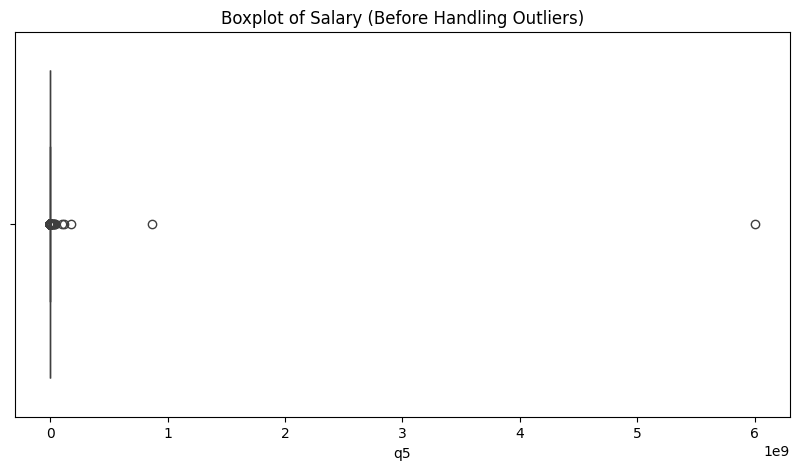

In [40]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['q5'])
plt.title('Boxplot of Salary (Before Handling Outliers)')
plt.show()




# Log transformation for better visualization

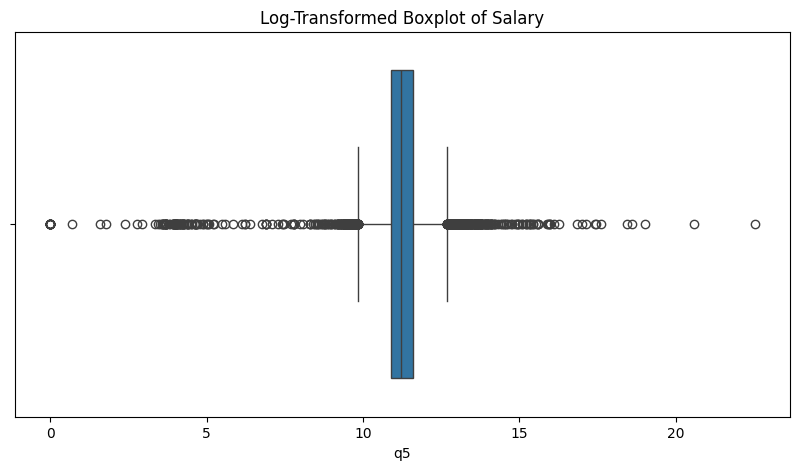

In [41]:

plt.figure(figsize=(10,5))
sns.boxplot(x=np.log1p(df['q5']))
plt.title('Log-Transformed Boxplot of Salary')
plt.show()



# Capping extreme salary values using 5th and 95th percentiles

In [42]:

q1_salary = df['q5'].quantile(0.05)
q3_salary = df['q5'].quantile(0.95)
print(f"\nSalary Capping: Values below {q1_salary} and above {q3_salary} will be capped.")
df['q5'] = np.clip(df['q5'], q1_salary, q3_salary)


Salary Capping: Values below 32000.0 and above 185000.0 will be capped.


# Detecting and handling outliers in bonus (q6)

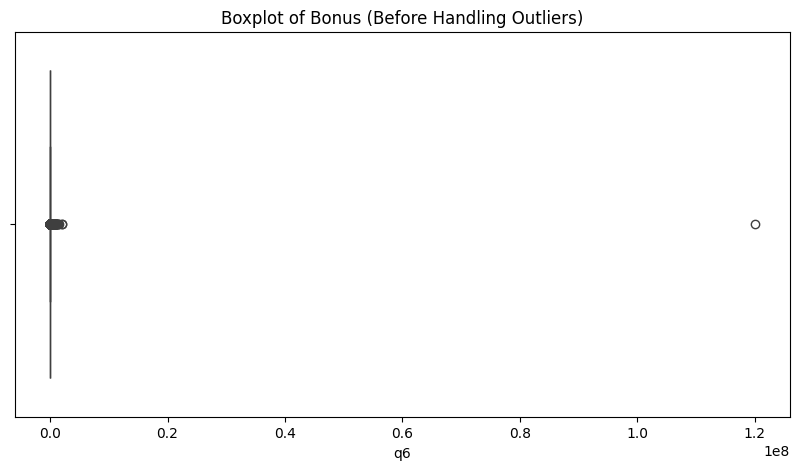

In [44]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['q6'])
plt.title('Boxplot of Bonus (Before Handling Outliers)')
plt.show()





# Log transformation for bonus visualization

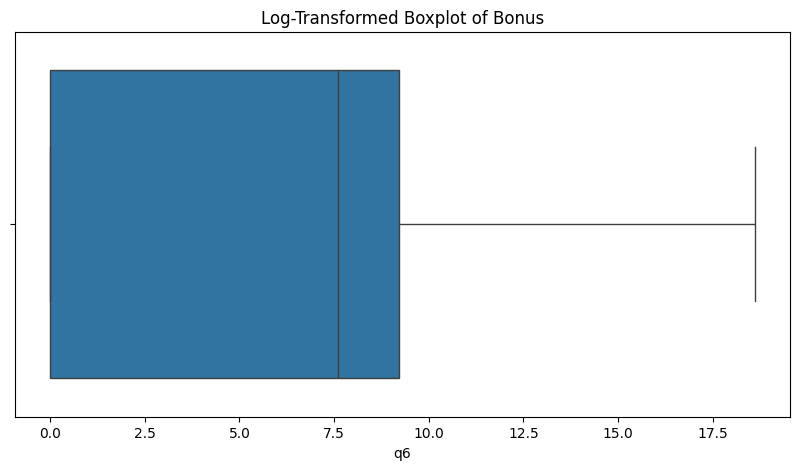

In [45]:

plt.figure(figsize=(10,5))
sns.boxplot(x=np.log1p(df['q6']))
plt.title('Log-Transformed Boxplot of Bonus')
plt.show()



# Capping extreme bonus values using 5th and 95th percentiles

In [46]:

q1_bonus = df['q6'].quantile(0.05)
q3_bonus = df['q6'].quantile(0.95)
print(f"\nBonus Capping: Values below {q1_bonus} and above {q3_bonus} will be capped.")
df['q6'] = np.clip(df['q6'], q1_bonus, q3_bonus)


Bonus Capping: Values below 0.0 and above 50000.0 will be capped.


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  28108 non-null  datetime64[ns]
 1   q1         28108 non-null  object        
 2   q2         28108 non-null  object        
 3   q3         28108 non-null  object        
 4   q5         28108 non-null  float64       
 5   q6         28108 non-null  float64       
 6   q7         28108 non-null  object        
 7   q10        28108 non-null  object        
 8   q11        28108 non-null  object        
 9   q12        28108 non-null  object        
 10  q13        28108 non-null  object        
 11  q14        28108 non-null  object        
 12  q15        28108 non-null  object        
 13  q16        28108 non-null  object        
 14  q17        28108 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 3.2+ MB


In [51]:
df.head()

,timestamp,q1,q2,q3,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16,q17
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.00,0.00,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600.00,4000.00,GBP,United Kingdom,California,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.00,0.00,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,62000.00,3000.00,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.00,7000.00,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [52]:
df.to_csv('cleaned_survey_data.csv', index=False)

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

What were the biggest issues you encountered in the messy dataset?

 The dataset presented multiple challenges, including a high percentage of missing values, inconsistencies in categorical data, extreme numerical outliers, and formatting issues. The most significant problem was the presence of missing data, with several columns containing more than 70% missing values (e.g., q8, q9). Additionally, numerical values such as salary (q5) were formatted as strings and contained unrealistic outliers, which had to be capped. Another major issue was categorical inconsistencies, where country names, industry labels, and job titles appeared in multiple formats, requiring standardization. Lastly, data imbalance in demographic fields posed challenges in maintaining representational fairness.



How did cleaning the dataset improve its usability for machine learning?


 Cleaning the dataset improved its usability for machine learning by ensuring that data was complete, consistent, and free from major distortions. Handling missing values through imputation prevented data loss, while standardizing categorical variables allowed for meaningful feature encoding. Outlier detection and handling ensured that extreme values are not present and they did not influence model training. Transforming salaries into a numeric format  made salary-related insights more reliable. These cleaning steps created a more structured dataset that is better suited for statistical modeling and machine learning applications.

What would happen if we trained a model on the messy dataset vs. the cleaned one?

 Training a model on the messy dataset would lead to unreliable and skewed predictions due to missing values, inconsistent formatting, and extreme outliers. The presence of high cardinality categorical variables would cause the model to struggle with generalization. Additionally, outliers in salary and bonus distributions could cause models to overfit to extreme cases, resulting in poor predictive performance. In contrast, the cleaned dataset provides a well-structured and balanced training set, leading to better model performance, increased accuracy, and more meaningful insights.

Do you feel you skewed or biased the dataset while cleaning it?

While cleaning the dataset, there is always a risk of introducing bias, especially when imputing missing values or handling outliers. For example, filling missing values with the mean or median could introduce bias if the missing values are not randomly distributed. Similarly, capping outliers might remove important information if those outliers are legitimate data points. However, by carefully considering the context of the data and using appropriate techniques, we can minimise the risk of introducing bias. The goal was to preserve as much data as possible while ensuring that the dataset is clean and usable for analysis.


## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 